**Word Adjacency Networks**

Multiple networks of words in French, Spanish, English and Japanese

The nodes of each of these networks are words of the language and there is a directed edge between two nodes if the source node word is immediately followed by the target node word at some point in the corpus. The networks are unweighted.

* The French network has 8,325 nodes and 24,295 edges with an average degree of 2.92.
* The Spanish network has 11,586 nodes and 45,129 edges with an average degree of 3.90.
* The Japanese network has 2,704 nodes and 8,300 edges with an average degree of 3.07.
* The English network has 7,381 nodes and 46,281 edges with an average degree of 6.27.

In [1]:
import networkx as nx
import numpy as np
def map_to_nodes(node_map):
    node_map.setdefault(0)
    # utility function to make it easy to compare dicts to array outputs
    return np.array(np.vectorize(lambda x: node_map.setdefault(x, 0))(nodelist))

**French**
For French, Spanish, and English, I only considered the first 3000 nodes because otherwise it took way too long to run.

In [20]:
F = nx.read_edgelist("french/edges.csv", comments="#", delimiter=",")
AF = nx.adjacency_matrix(F)
AF = AF[:3000,:3000]
F = nx.from_numpy_array(AF, create_using=nx.DiGraph)

S = nx.read_edgelist("spanish/edges.csv", comments="#", delimiter=",")
AS = nx.adjacency_matrix(S)
AS = AS[:3000,:3000]
S = nx.from_numpy_array(AS, create_using=nx.DiGraph)

J = nx.read_edgelist("japanese/edges.csv", comments="#", delimiter=",")
AJ = nx.adjacency_matrix(J)
AJ = AJ[:,:]
J = nx.from_numpy_array(AJ, create_using=nx.DiGraph)

D = nx.read_edgelist("darwin/edges.csv", comments="#", delimiter=",")
AD = nx.adjacency_matrix(D)
AD = AD[:3000,:3000]
D = nx.from_numpy_array(AD, create_using=nx.DiGraph)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from graspologic.plot import networkplot
import seaborn as sns
from matplotlib import colors


node_dataF = pd.DataFrame(index=F.nodes())
node_dataF["degree"] = node_dataF.index.map(dict(nx.degree(F)))
node_dataF["eigenvector"] = node_dataF.index.map(nx.eigenvector_centrality(F))
node_dataF["pagerank"] = node_dataF.index.map(nx.pagerank(F))
#node_data["betweenness"] = node_data.index.map(nx.betweenness_centrality(F))

In [74]:
pos = nx.kamada_kawai_layout(F)

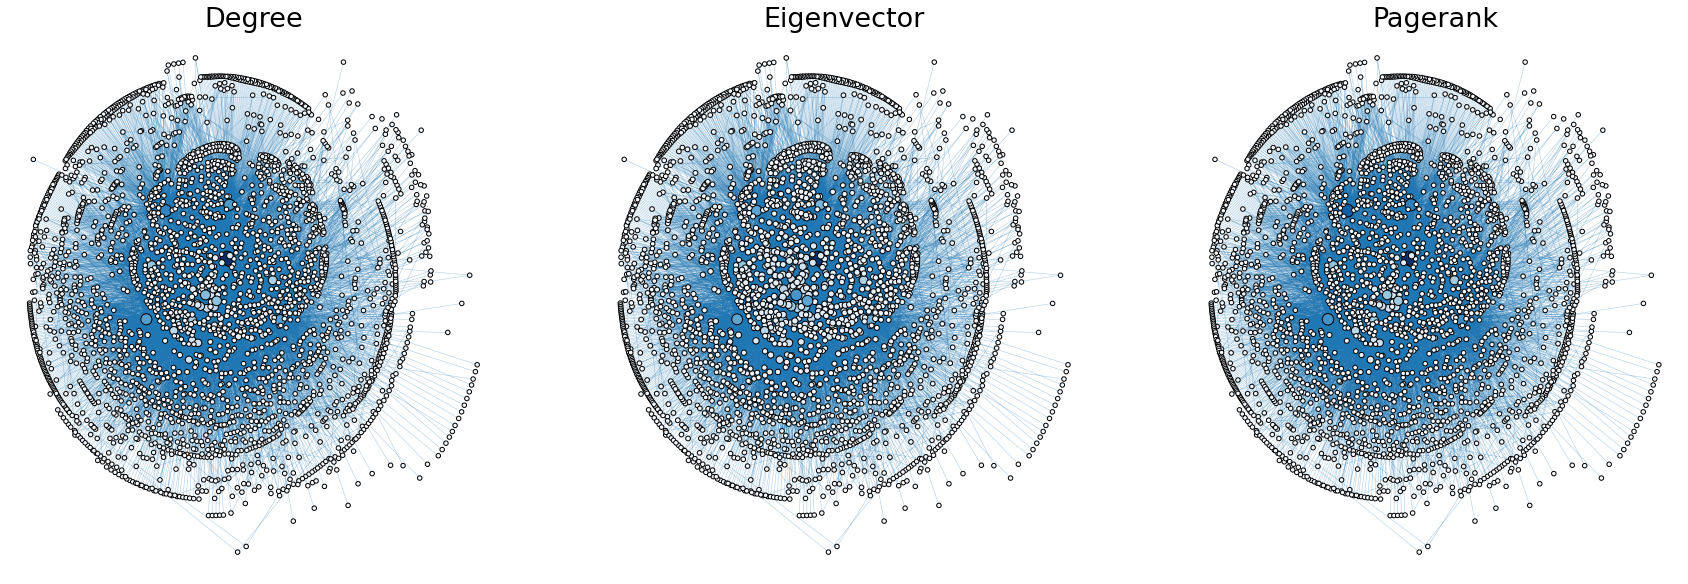

In [75]:

node_dataF["x"] = [pos[node][0] for node in node_dataF.index]
node_dataF["y"] = [pos[node][1] for node in node_dataF.index]

sns.set_context("talk", font_scale=1.5)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

def plot_node_scaled_network(A, node_data, key, ax):
    # REF: https://github.com/mwaskom/seaborn/blob/9425588d3498755abd93960df4ab05ec1a8de3ef/seaborn/_core.py#L215

    levels = list(np.sort(node_data[key].unique()))
    cmap = sns.color_palette("Blues", as_cmap=True)
    vmin = np.min(levels)
    norm = colors.Normalize(vmin=0.3 * vmin)
    palette = dict(zip(levels, cmap(norm(levels))))

    networkplot(
        A,
        node_data=node_data,
        x="x",
        y="y",
        ax=ax,
        edge_linewidth=0.5,
        node_size=key,
        node_hue=key,
        palette=palette,
        node_sizes=(20, 200),
        node_kws=dict(linewidth=1, edgecolor="black"),
        node_alpha=1.0,
        edge_kws=dict(color=sns.color_palette()[0])
    )

    ax.axis("off")
    ax.set_title(key.capitalize())

ax = axs[0]
plot_node_scaled_network(AF, node_dataF, "degree", ax)

ax = axs[1]
plot_node_scaled_network(AF, node_dataF, "eigenvector", ax)

ax = axs[2]
plot_node_scaled_network(AF, node_dataF, "pagerank", ax)

#ax = axs[3]
#plot_node_scaled_network(A, node_data, "betweenness", ax)

fig.set_facecolor("w")


Plotting different centrality measures: degree centrality, eigenvector centrality, PageRank for the French network.
Notice the one dark blue dot in most of these is probably one of the functional words of French that is very common (determiner "le" etc.) The highest degree is 1858.

In [15]:
node_dataS = pd.DataFrame(index=S.nodes())
node_dataS["degree"] = node_dataS.index.map(dict(nx.degree(S)))
node_dataS["eigenvector"] = node_dataS.index.map(nx.eigenvector_centrality(S))
node_dataS["pagerank"] = node_dataS.index.map(nx.pagerank(S))
posS = nx.kamada_kawai_layout(S)

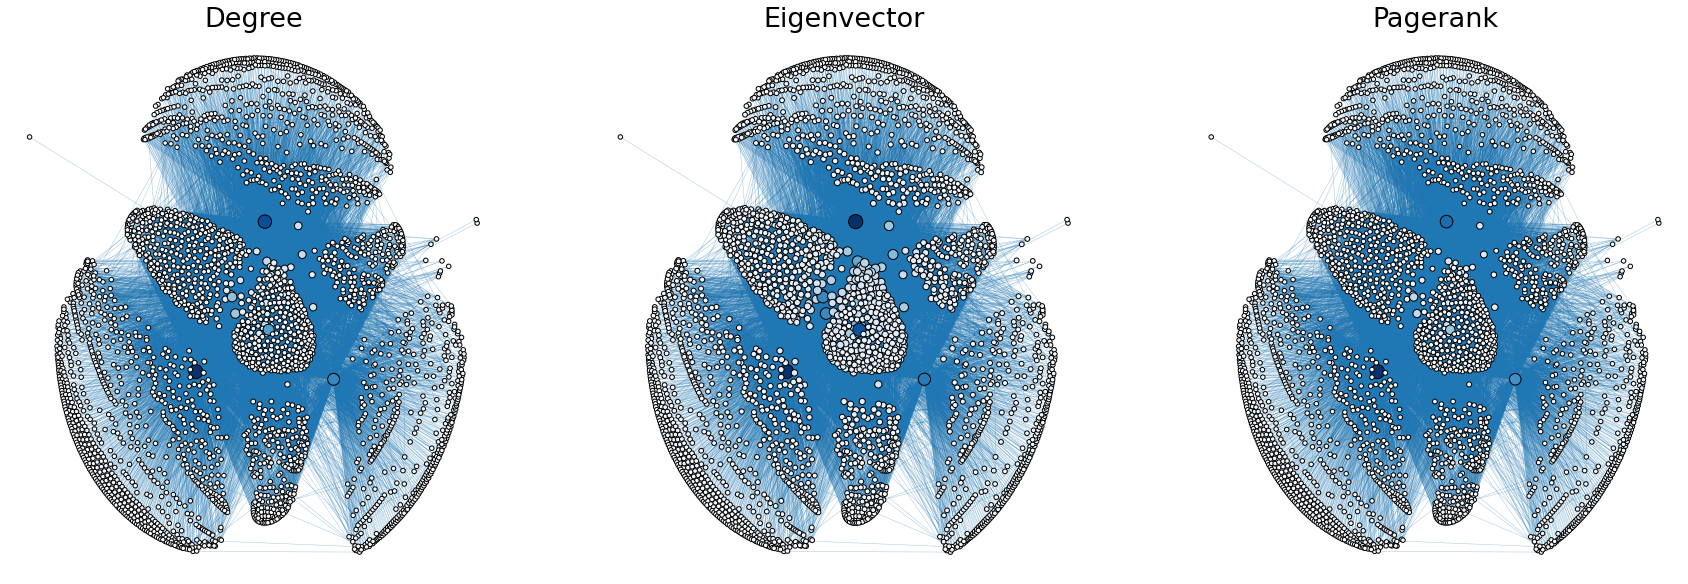

In [16]:
node_dataS["x"] = [posS[node][0] for node in node_dataS.index]
node_dataS["y"] = [posS[node][1] for node in node_dataS.index]

sns.set_context("talk", font_scale=1.5)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

def plot_node_scaled_network(A, node_data, key, ax):
    # REF: https://github.com/mwaskom/seaborn/blob/9425588d3498755abd93960df4ab05ec1a8de3ef/seaborn/_core.py#L215

    levels = list(np.sort(node_data[key].unique()))
    cmap = sns.color_palette("Blues", as_cmap=True)
    vmin = np.min(levels)
    norm = colors.Normalize(vmin=0.3 * vmin)
    palette = dict(zip(levels, cmap(norm(levels))))

    networkplot(
        A,
        node_data=node_data,
        x="x",
        y="y",
        ax=ax,
        edge_linewidth=0.5,
        node_size=key,
        node_hue=key,
        palette=palette,
        node_sizes=(20, 200),
        node_kws=dict(linewidth=1, edgecolor="black"),
        node_alpha=1.0,
        edge_kws=dict(color=sns.color_palette()[0])
    )

    ax.axis("off")
    ax.set_title(key.capitalize())

ax = axs[0]
plot_node_scaled_network(AS, node_dataS, "degree", ax)

ax = axs[1]
plot_node_scaled_network(AS, node_dataS, "eigenvector", ax)

ax = axs[2]
plot_node_scaled_network(AS, node_dataS, "pagerank", ax)

#ax = axs[3]
#plot_node_scaled_network(A, node_data, "betweenness", ax)

fig.set_facecolor("w")

Plotting different centrality measures: degree centrality, eigenvector centrality, PageRank for the Spanish network.
Notice the darkest dots in most of these are probably  functional words of Spanish that are very common (determiner "el", "la" etc.) The highest degree is 3460.

In [22]:
node_dataJ = pd.DataFrame(index=J.nodes())
node_dataJ["degree"] = node_dataJ.index.map(dict(nx.degree(J)))
node_dataJ["eigenvector"] = node_dataJ.index.map(nx.eigenvector_centrality(J))
node_dataJ["pagerank"] = node_dataJ.index.map(nx.pagerank(J))
posJ = nx.kamada_kawai_layout(J)

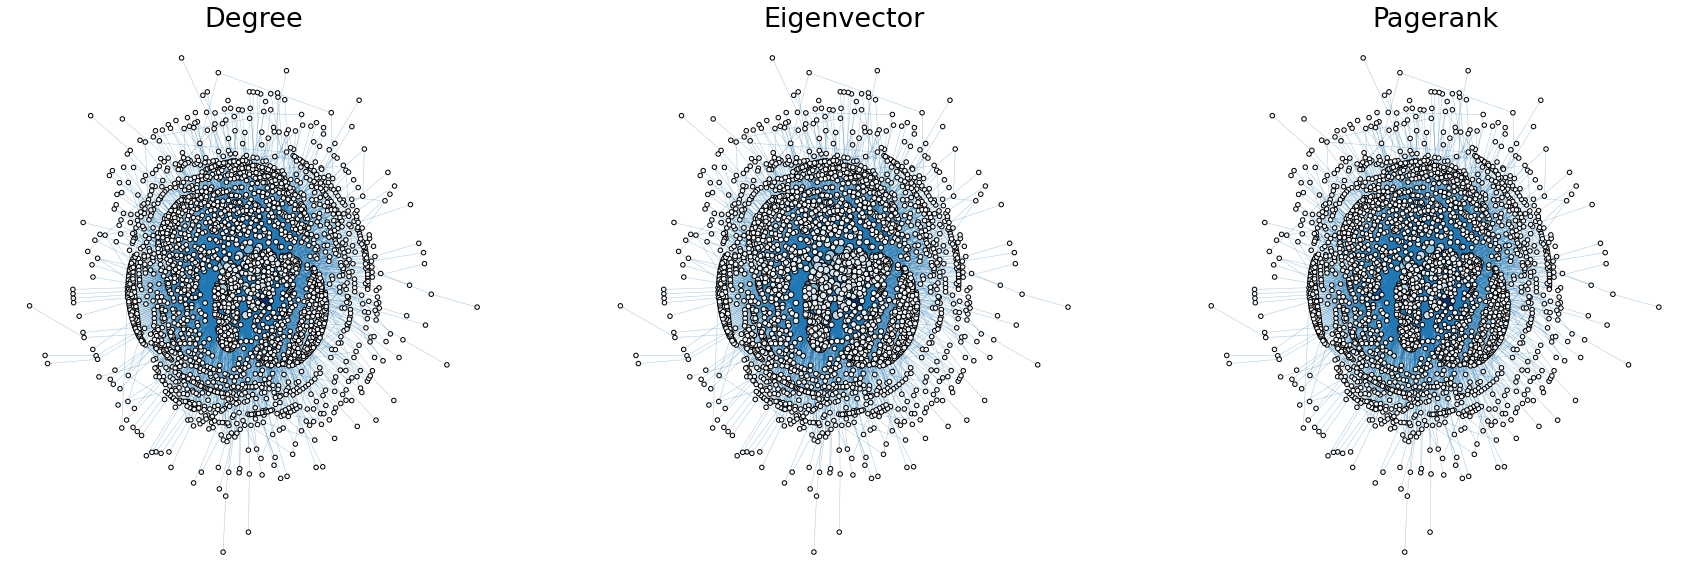

In [23]:
node_dataJ["x"] = [posJ[node][0] for node in node_dataJ.index]
node_dataJ["y"] = [posJ[node][1] for node in node_dataJ.index]

sns.set_context("talk", font_scale=1.5)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

def plot_node_scaled_network(A, node_data, key, ax):
    # REF: https://github.com/mwaskom/seaborn/blob/9425588d3498755abd93960df4ab05ec1a8de3ef/seaborn/_core.py#L215

    levels = list(np.sort(node_data[key].unique()))
    cmap = sns.color_palette("Blues", as_cmap=True)
    vmin = np.min(levels)
    norm = colors.Normalize(vmin=0.3 * vmin)
    palette = dict(zip(levels, cmap(norm(levels))))

    networkplot(
        A,
        node_data=node_data,
        x="x",
        y="y",
        ax=ax,
        edge_linewidth=0.5,
        node_size=key,
        node_hue=key,
        palette=palette,
        node_sizes=(20, 200),
        node_kws=dict(linewidth=1, edgecolor="black"),
        node_alpha=1.0,
        edge_kws=dict(color=sns.color_palette()[0])
    )

    ax.axis("off")
    ax.set_title(key.capitalize())

fig.set_facecolor("w")
    
ax = axs[0]
plot_node_scaled_network(AJ, node_dataJ, "degree", ax)

ax = axs[1]
plot_node_scaled_network(AJ, node_dataJ, "eigenvector", ax)

ax = axs[2]
plot_node_scaled_network(AJ, node_dataJ, "pagerank", ax)

#ax = axs[3]
#plot_node_scaled_network(A, node_data, "betweenness", ax)

fig.set_facecolor("w")

Plotting different centrality measures: degree centrality, eigenvector centrality, PageRank for the Japanese network. The highest degree is 1450.

In [19]:
node_dataD = pd.DataFrame(index=D.nodes())
node_dataD["degree"] = node_dataD.index.map(dict(nx.degree(D)))
node_dataD["eigenvector"] = node_dataD.index.map(nx.eigenvector_centrality(D))
node_dataD["pagerank"] = node_dataD.index.map(nx.pagerank(D))
posD = nx.kamada_kawai_layout(D)

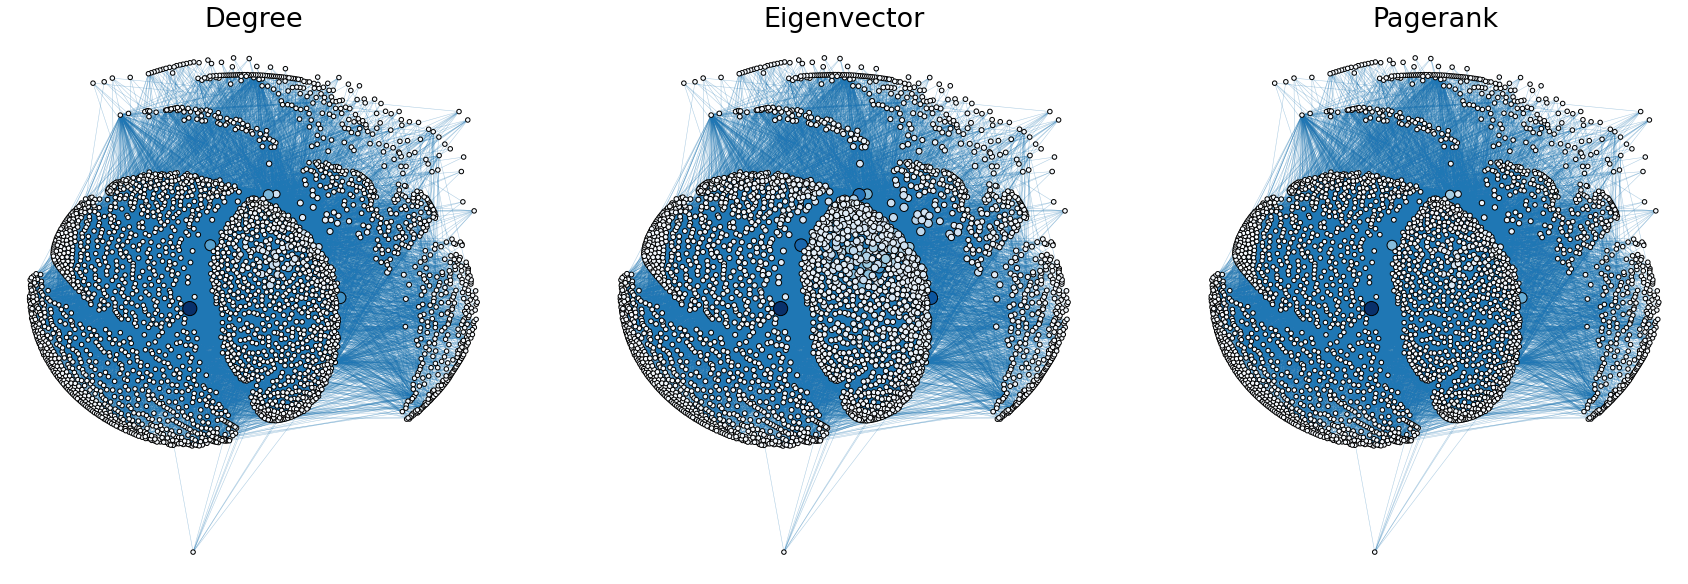

In [21]:
node_dataD["x"] = [posD[node][0] for node in node_dataD.index]
node_dataD["y"] = [posD[node][1] for node in node_dataD.index]

sns.set_context("talk", font_scale=1.5)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

def plot_node_scaled_network(A, node_data, key, ax):
    # REF: https://github.com/mwaskom/seaborn/blob/9425588d3498755abd93960df4ab05ec1a8de3ef/seaborn/_core.py#L215

    levels = list(np.sort(node_data[key].unique()))
    cmap = sns.color_palette("Blues", as_cmap=True)
    vmin = np.min(levels)
    norm = colors.Normalize(vmin=0.3 * vmin)
    palette = dict(zip(levels, cmap(norm(levels))))

    networkplot(
        A,
        node_data=node_data,
        x="x",
        y="y",
        ax=ax,
        edge_linewidth=0.5,
        node_size=key,
        node_hue=key,
        palette=palette,
        node_sizes=(20, 200),
        node_kws=dict(linewidth=1, edgecolor="black"),
        node_alpha=1.0,
        edge_kws=dict(color=sns.color_palette()[0])
    )

    ax.axis("off")
    ax.set_title(key.capitalize())

ax = axs[0]
plot_node_scaled_network(AF, node_dataD, "degree", ax)

ax = axs[1]
plot_node_scaled_network(AF, node_dataD, "eigenvector", ax)

ax = axs[2]
plot_node_scaled_network(AF, node_dataD, "pagerank", ax)

#ax = axs[3]
#plot_node_scaled_network(A, node_data, "betweenness", ax)

fig.set_facecolor("w")

Plotting different centrality measures: degree centrality, eigenvector centrality, PageRank for the English network.
Notice the darkest dots in most of these are probably functional words of English that are very common (determiner "the" etc.) The highest degree is 4400.